In [80]:
import matplotlib.pyplot as plt
import os
os.environ["PROJ_LIB"] = "C:\\Users\\igce\\Anaconda3\\Library\\share"
from mpl_toolkits.basemap import Basemap, maskoceans
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib as mpl

In [81]:
df = pd.read_table('C:/Users/igce/Downloads/yy_vfe2018i.xyz', sep = '\s+')

In [82]:
df[df == -99] = np.nan

In [83]:
df.head()

,inn,LON,LAT,v_yy,f_yy,ex_yy,v_s1,f_s1,ex_s1,v_s2,...,_GA,__iWMO,Name_____________________,Country_,_,_.1,_.2,_.3,_.4,_.5
0,1,-8.7,70.9,NaN,NaN,NaN,1.9,88.7,0.0,2.8,...,0,1001,Jan,Mayen,NORWAY,NaN,NaN,NaN,NaN,NaN
1,2,15.5,78.3,NaN,NaN,NaN,6.9,96.3,0.0,3.2,...,0,1008,Svalbard,Lufthavn,NORWAY,NaN,NaN,NaN,NaN,NaN
2,6,18.9,69.7,NaN,NaN,NaN,-0.3,48.6,0.0,1.3,...,0,1025,TROMSO/LANGNES,NORWAY,NaN,NaN,NaN,NaN,NaN,NaN
3,7,18.9,69.7,NaN,NaN,NaN,-0.3,44.3,0.0,1.7,...,0,1026,Tromsoe,NORWAY,NaN,NaN,NaN,NaN,NaN,NaN
4,8,19.0,74.5,NaN,NaN,NaN,4.0,94.9,0.0,2.6,...,0,1028,Bjoernoeya,NORWAY,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data = df['v_yy'].values
lon = df['LON'].values
lat = df['LAT'].values

In [85]:
lonex_p = df['LON'][df['ex_yy'] == 2].values
latex_p = df['LAT'][df['ex_yy'] == 2].values

lonex_m = df['LON'][df['ex_yy'] == -2].values
latex_m = df['LAT'][df['ex_yy'] == -2].values

In [86]:
lon95 = df['LON'][df['f_yy'] >= 95].values
lat95 = df['LAT'][df['f_yy'] >= 95].values

lon05 = df['LON'][df['f_yy'] <= 5].values
lat05 = df['LAT'][df['f_yy'] <= 5].values

In [87]:
lonGA = df['LON'][df['_GA'] == 1].values
latGA = df['LAT'][df['_GA'] == 1].values
dataGA = df['v_yy'][df['_GA'] == 1].values

In [88]:
grid_x, grid_y = np.mgrid[-180:180:3600j, -90:90:1800j]

In [89]:
co = np.column_stack((lon, lat))

In [90]:
grid_z0 = griddata(co, data, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(co, data, (grid_x, grid_y), method='linear')
grid_z2 = griddata(co, data, (grid_x, grid_y), method='cubic')

"\nplt.savefig('2.1.png', dpi = 1000, facecolor='w', edgecolor='w',\n        orientation='portrait', papertype=None, format=None,\n        transparent=False, bbox_inches=None, pad_inches=0.1,\n        frameon=None, metadata=None)\n"

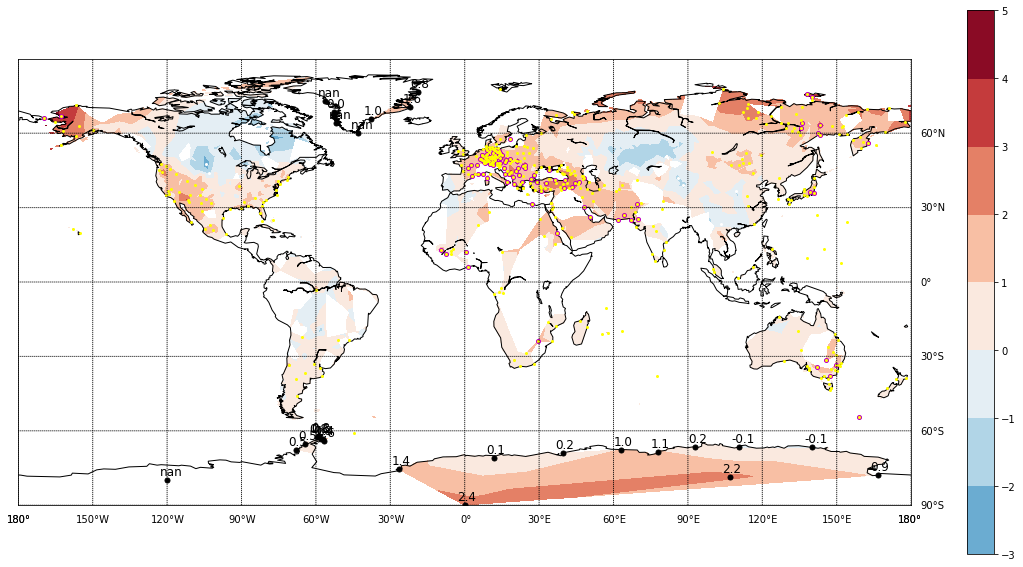

In [101]:
fig = plt.figure(figsize = (20, 10))

m = Basemap()

m.drawcoastlines()
masked = maskoceans(grid_x, grid_y, grid_z1, inlands = False)

norm = mpl.colors.Normalize(vmin = -5, vmax = 5)

#m.pcolormesh(grid_x, grid_y, masked, cmap = plt.cm.RdYlBu_r, norm = norm)
m.contourf(grid_x, grid_y, masked, cmap = plt.cm.RdBu_r, norm = norm)

m.plot(lonex_p, latex_p, color='m', marker='o', markersize = 4, linewidth=0)
m.plot(lonex_m, latex_m, color='w', marker='o', markersize = 4, linewidth=0)
m.plot(lon95, lat95,  color='yellow', marker='o', markersize = 2, linewidth=0)
m.plot(lon05, lat05,  color='w', marker='o', markersize = 2, linewidth=0)

parallels = np.arange(-90, 90, 30)
m.drawparallels(parallels, labels= [False, True, True, False])
meridians = np.arange(-180, 180, 30)
m.drawmeridians(meridians, labels = [True, False, False, True])


for i in range(len(dataGA)):
    if dataGA[i] != -99:
        plt.plot(lonGA[i], latGA[i], 'ok', markersize=5)
        plt.text(lonGA[i] - 3, latGA[i] + 2, dataGA[i], fontsize=12)
        
plt.colorbar()


'''
plt.savefig('2.1.png', dpi = 1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
'''